## Trapped fraction

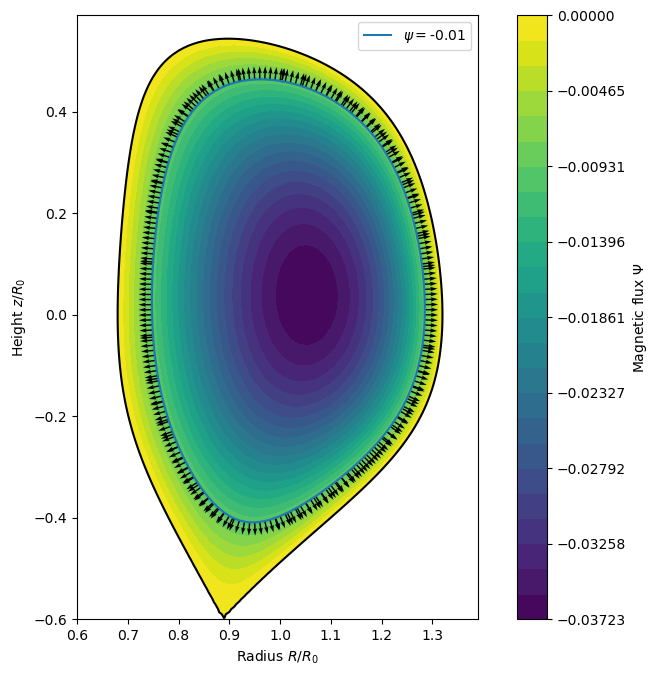

In [1]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = plasmaboundaries.ITER.copy()
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
ax = eq.plot()
fs = eq.get_flux_surface(-0.01)
fs.plot(ax, n=True);

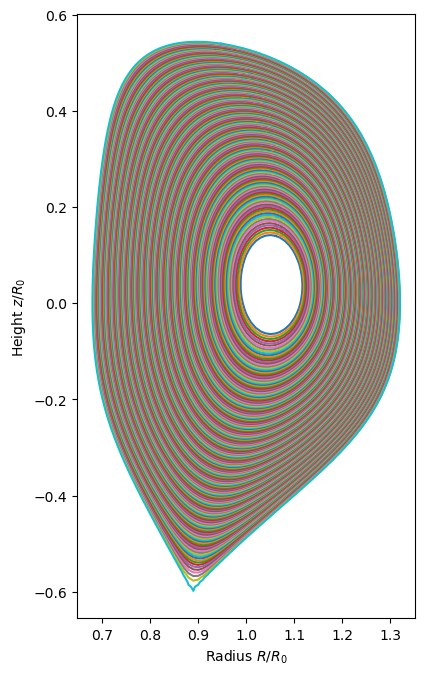

In [2]:
levels = np.linspace(-0.03556, 0, 200)
surfaces = {level: eq.get_flux_surface(level) for level in levels}

# ax = eq.plot()
ax = None
for fs in surfaces.values():
    ax = fs.plot(ax, legend=False)

In [3]:
trapped_fractions = {}
for psi_value, fs in surfaces.items():
    trapped_fractions[psi_value] = {
        "f_tl": fs._f_tl,
        "f_tu": fs._f_tu,
        "f_t": fs.trapped_fraction(),
    }
import pandas as pd

df = pd.DataFrame(trapped_fractions).T

,f_tl,f_tu,f_t
-0.035560,-0.146881,0.353904,0.228708
-0.035381,-0.138302,0.361866,0.236824
-0.035203,-0.129445,0.369658,0.244883
-0.035024,-0.121832,0.376675,0.252049
-0.034845,-0.114229,0.383322,0.258935
...,...,...,...
-0.000715,0.221523,0.665191,0.554274
-0.000536,0.223361,0.665985,0.555329
-0.000357,0.224630,0.666390,0.555950
-0.000179,0.226914,0.666989,0.556970


<AxesSubplot:>

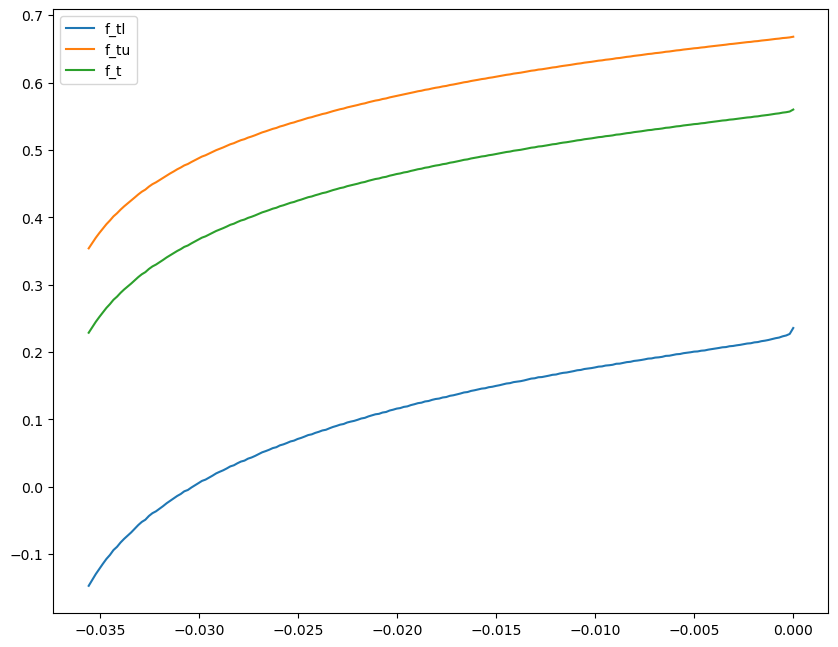

In [4]:
df.plot()

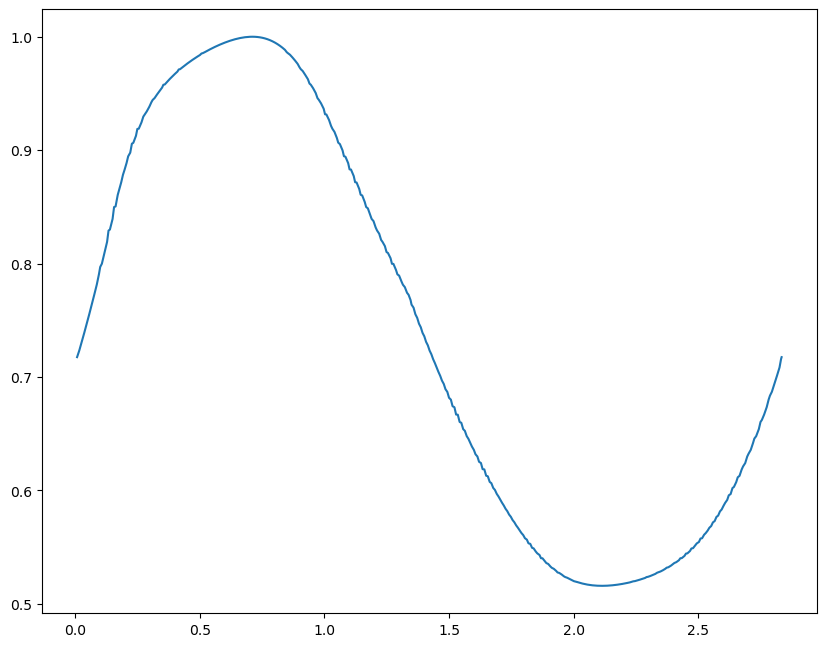

In [5]:
h = fs.Bmag / fs.Bmax
plt.plot(fs.lp, h)

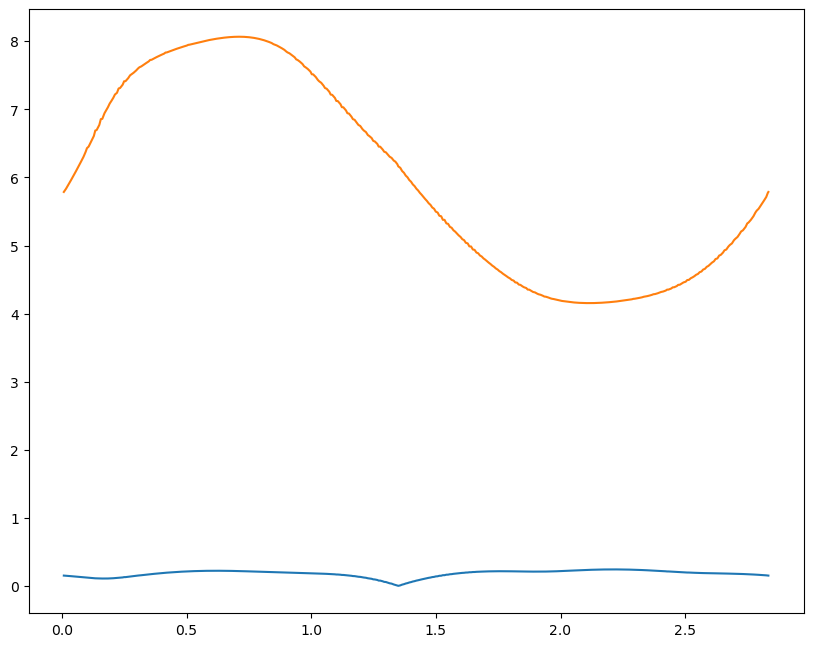

In [6]:
plt.plot(fs.lp, fs.Bp)
plt.plot(fs.lp, fs.Bphivals)

In [7]:
hmean = fs.flux_surface_average(h)

0.7564374751405418

In [8]:
h2mean = fs.flux_surface_average(h ** 2)

0.5940455418510815

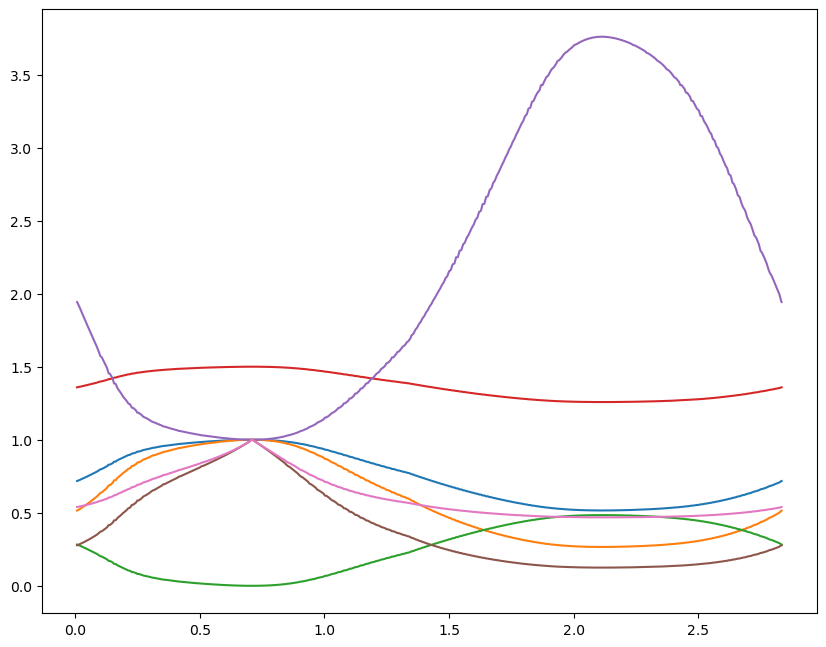

In [9]:
plt.plot(fs.lp, h),
plt.plot(fs.lp, h ** 2)
plt.plot(fs.lp, 1 - h)
plt.plot(fs.lp, 1 + h / 2)
plt.plot(fs.lp, h ** -2)
plt.plot(fs.lp, (1 - (1 - h) ** 0.5 * (1 + h / 2)))
plt.plot(fs.lp, (1 - (1 - h) ** 0.5 * (1 + h / 2)) / h ** 2)

In [10]:
f_tu = 1 - h2mean / hmean ** 2 * (1 - (1 - hmean) ** 0.5 * (1 + hmean / 2))
f_tl = 1 - h2mean * fs.flux_surface_average(
    h ** -2 * (1 - (1 - h) ** 0.5) * (1 + h / 2)
)
f_tu, f_tl, (f_tu - f_tl) / f_tl

(0.667967729454466, 0.23571654692135613, 1.8337753041890823)

In [11]:
if not (f_tu - f_tl) / f_tl < 0.1:
    print(f_tu, f_tl, (f_tu - f_tl) / f_tl)

0.667967729454466 0.23571654692135613 1.8337753041890823
